In [30]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = r"C:\Users\David\Documents\Albert school\Carmila alberton\Data for the CARMILA challenge\df_final2.csv"
df = pd.read_csv(file_path)

In [31]:
df.head()

,Jour,Entrées,Mall ID,Année,Mois,jour_semaine,GLA centre (hyper + galerie+ mail) GI,GLA boutiques (hors mail - GI),Nombre places de parking (Assetbook),Nombre de boutiques (hors hyper),ALIMENTATION,EQ DE LA PERSONNE,EQ DE LA MAISON,LOISIRS,RESTAURATION,SERVICES,DIVERS
0,2023-01-01,0.0,53,2023,1,Sunday,31740,5273,4450,36,1,5,0,7,5,11,7
1,2023-01-01,0.0,53,2023,1,Sunday,31740,5273,4450,36,1,5,0,7,5,11,7
2,2023-01-01,0.0,53,2023,1,Sunday,31740,5273,4450,36,1,5,0,7,5,11,7
3,2023-01-01,0.0,53,2023,1,Sunday,31740,5273,4450,36,1,5,0,7,5,11,7
4,2023-01-01,0.0,53,2023,1,Sunday,31740,5273,4450,36,1,5,0,7,5,11,7


In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Identify numerical columns for normalization (excluding target variable 'Entrées')
num_features = [
    'GLA centre (hyper + galerie+ mail) GI',
    'GLA boutiques (hors mail - GI)',
    'Nombre places de parking (Assetbook)',
    'Nombre de boutiques (hors hyper)',
    'ALIMENTATION', 'EQ DE LA PERSONNE', 'EQ DE LA MAISON',
    'LOISIRS', 'RESTAURATION', 'SERVICES', 'DIVERS'
]

# Check which columns exist in df to avoid errors
num_features = [col for col in num_features if col in df.columns]

# Initialize scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Normalize: Use StandardScaler for normally distributed columns, MinMaxScaler for skewed ones
for feature in num_features:
    if df[feature].nunique() > 1:  # Check if column has more than one unique value
        if df[feature].skew() < 1:  # Normal distribution
            df[feature] = scaler_standard.fit_transform(df[[feature]])
        else:  # Skewed distribution
            df[feature] = scaler_minmax.fit_transform(df[[feature]])
    else:
        print(f"⚠ Skipping normalization for '{feature}' (only one unique value)")

In [33]:
df.head()

,Jour,Entrées,Mall ID,Année,Mois,jour_semaine,GLA centre (hyper + galerie+ mail) GI,GLA boutiques (hors mail - GI),Nombre places de parking (Assetbook),Nombre de boutiques (hors hyper),ALIMENTATION,EQ DE LA PERSONNE,EQ DE LA MAISON,LOISIRS,RESTAURATION,SERVICES,DIVERS
0,2023-01-01,0.0,53,2023,1,Sunday,-0.243055,-0.909725,1.0,-0.968766,-0.966282,-1.150213,-0.745356,-0.389249,-0.551677,-1.113519,0.419067
1,2023-01-01,0.0,53,2023,1,Sunday,-0.243055,-0.909725,1.0,-0.968766,-0.966282,-1.150213,-0.745356,-0.389249,-0.551677,-1.113519,0.419067
2,2023-01-01,0.0,53,2023,1,Sunday,-0.243055,-0.909725,1.0,-0.968766,-0.966282,-1.150213,-0.745356,-0.389249,-0.551677,-1.113519,0.419067
3,2023-01-01,0.0,53,2023,1,Sunday,-0.243055,-0.909725,1.0,-0.968766,-0.966282,-1.150213,-0.745356,-0.389249,-0.551677,-1.113519,0.419067
4,2023-01-01,0.0,53,2023,1,Sunday,-0.243055,-0.909725,1.0,-0.968766,-0.966282,-1.150213,-0.745356,-0.389249,-0.551677,-1.113519,0.419067


In [34]:
# Définition de l'ordre des jours en anglais
categories = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# Initialisation de l'encoder
encoder = OrdinalEncoder(categories=categories)

# Encodage uniquement de la colonne 'jour_semaine'
df['jour_semaine'] = encoder.fit_transform(df[['jour_semaine']]).astype(int) + 1  # +1 pour obtenir des valeurs de 1 à 7

# Vérification
print(df['jour_semaine'].unique())

[7 1 2 3 4 5 6]


In [36]:
df.head()

,Jour,Entrées,Mall ID,Année,Mois,jour_semaine,GLA centre (hyper + galerie+ mail) GI,GLA boutiques (hors mail - GI),Nombre places de parking (Assetbook),Nombre de boutiques (hors hyper),ALIMENTATION,EQ DE LA PERSONNE,EQ DE LA MAISON,LOISIRS,RESTAURATION,SERVICES,DIVERS
0,2023-01-01,0.0,53,2023,1,7,-0.243055,-0.909725,1.0,-0.968766,-0.966282,-1.150213,-0.745356,-0.389249,-0.551677,-1.113519,0.419067
1,2023-01-01,0.0,53,2023,1,7,-0.243055,-0.909725,1.0,-0.968766,-0.966282,-1.150213,-0.745356,-0.389249,-0.551677,-1.113519,0.419067
2,2023-01-01,0.0,53,2023,1,7,-0.243055,-0.909725,1.0,-0.968766,-0.966282,-1.150213,-0.745356,-0.389249,-0.551677,-1.113519,0.419067
3,2023-01-01,0.0,53,2023,1,7,-0.243055,-0.909725,1.0,-0.968766,-0.966282,-1.150213,-0.745356,-0.389249,-0.551677,-1.113519,0.419067
4,2023-01-01,0.0,53,2023,1,7,-0.243055,-0.909725,1.0,-0.968766,-0.966282,-1.150213,-0.745356,-0.389249,-0.551677,-1.113519,0.419067


Baseline

In [37]:
df.columns

Index(['Jour', 'Entrées', 'Mall ID', 'Année', 'Mois', 'jour_semaine',
       'GLA centre (hyper + galerie+ mail) GI',
       'GLA boutiques (hors mail - GI)',
       'Nombre places de parking (Assetbook)',
       'Nombre de boutiques (hors hyper)', 'ALIMENTATION', 'EQ DE LA PERSONNE',
       'EQ DE LA MAISON', 'LOISIRS', 'RESTAURATION', 'SERVICES', 'DIVERS'],
      dtype='object')

In [40]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialisation des résultats
results = {}

# Liste des IDs uniques
mall_ids = df['Mall ID'].unique()

# Boucle sur chaque Mall ID
for mall_id in mall_ids:
    df_mall = df[df['Mall ID'] == mall_id].copy()  # Sélection des données du Mall
    
    # Séparation des features et de la target
    X = df_mall.drop(columns=['Entrées', 'Jour', 'Mall ID'])  # On enlève la target et la date
    y = df_mall['Entrées']
    
    # Division en train/test (sans shuffle pour respecter l’ordre temporel)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Initialisation et entraînement du modèle XGBoost
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)
    model.fit(X_train, y_train)
    
    # Prédictions
    y_pred = model.predict(X_test)
    
    # Évaluation
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Stockage des résultats
    results[mall_id] = {'MAE': mae, 'RMSE': rmse, 'model': model}

# Affichage des résultats pour chaque Mall ID
for mall_id, metrics in results.items():
    print(f"Mall ID {mall_id} -> MAE: {metrics['MAE']:.2f}, RMSE: {metrics['RMSE']:.2f}")


Mall ID 53 -> MAE: 554.13, RMSE: 607.09
Mall ID 38 -> MAE: 695.74, RMSE: 827.83
Mall ID 37 -> MAE: 616.23, RMSE: 708.14
Mall ID 5 -> MAE: 345.87, RMSE: 414.42
Mall ID 20 -> MAE: 259.50, RMSE: 308.60
Mall ID 71 -> MAE: 267.56, RMSE: 304.93
Mall ID 10 -> MAE: 522.92, RMSE: 595.45
Mall ID 11 -> MAE: 572.98, RMSE: 658.94
Mall ID 47 -> MAE: 475.27, RMSE: 563.26
Mall ID 19 -> MAE: 452.82, RMSE: 535.87


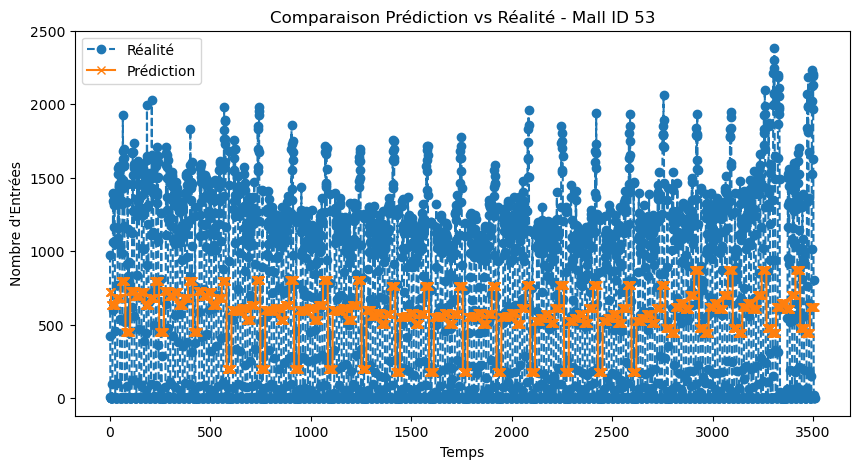

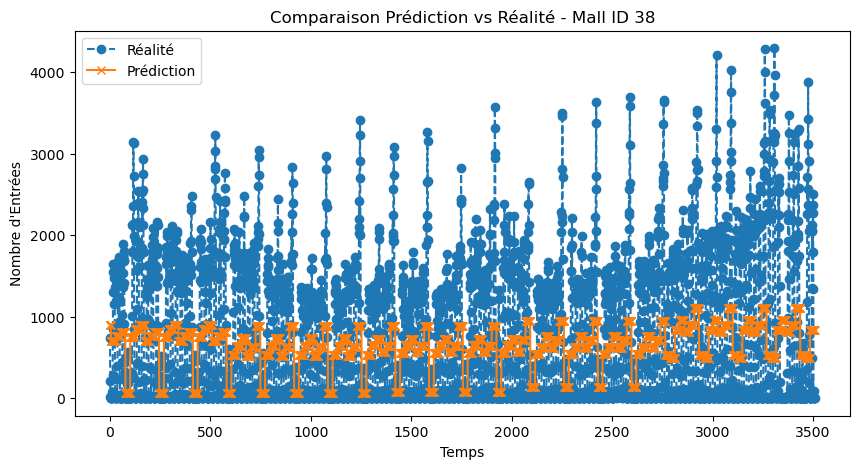

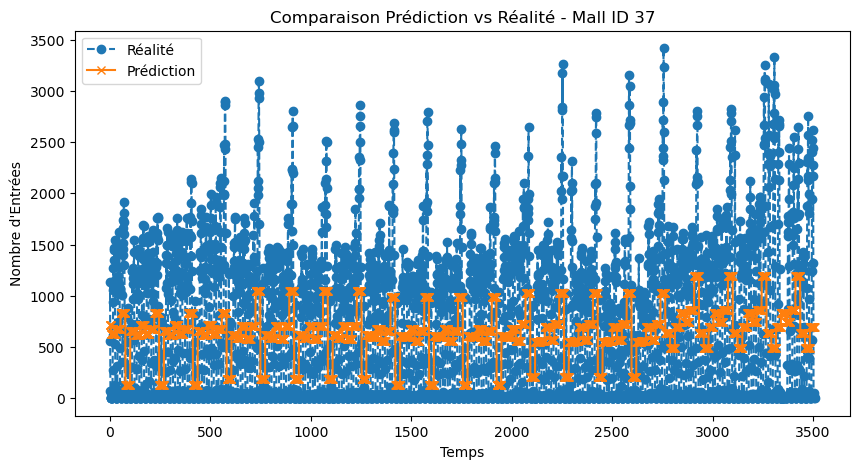

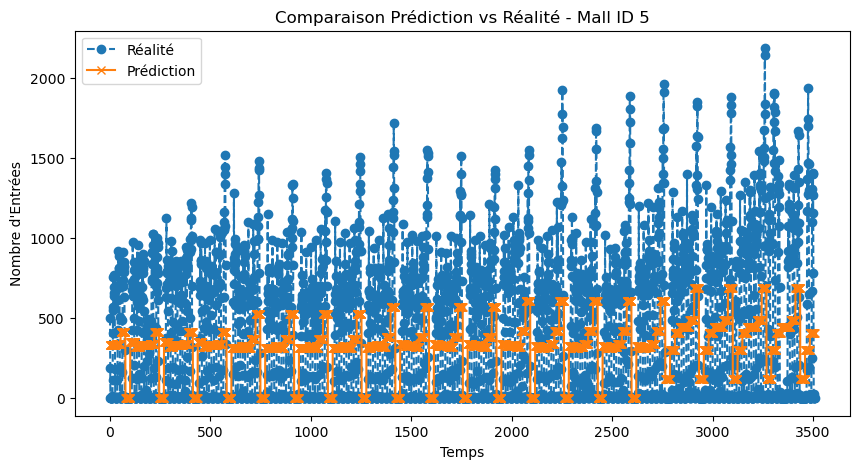

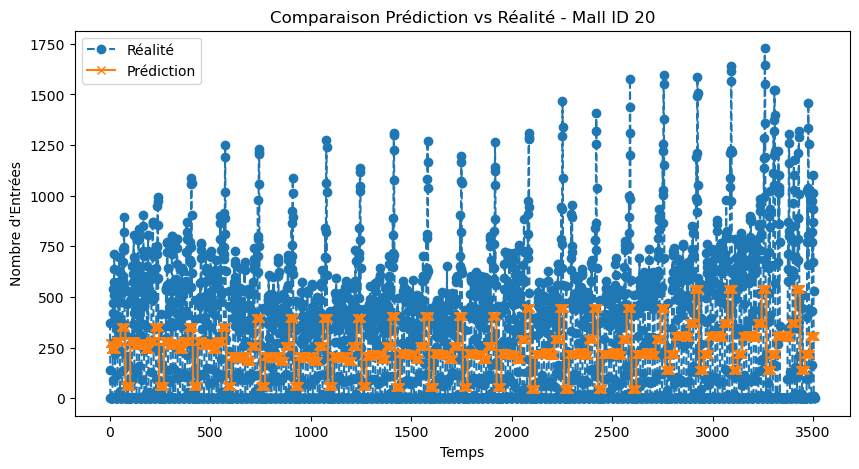

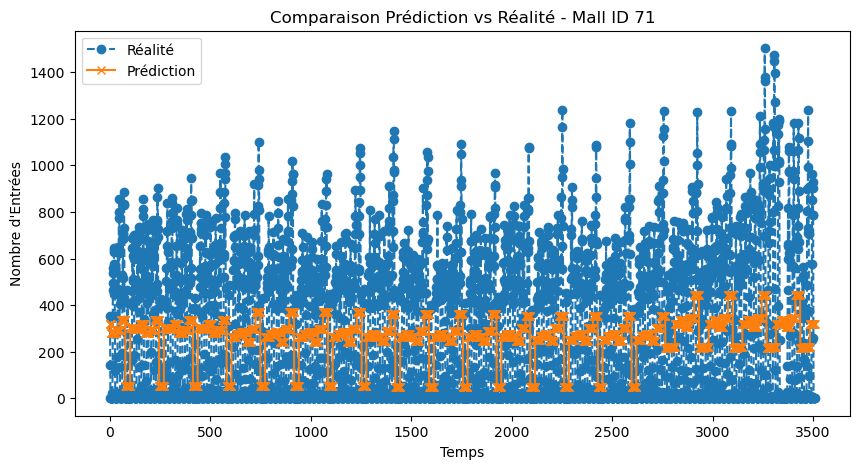

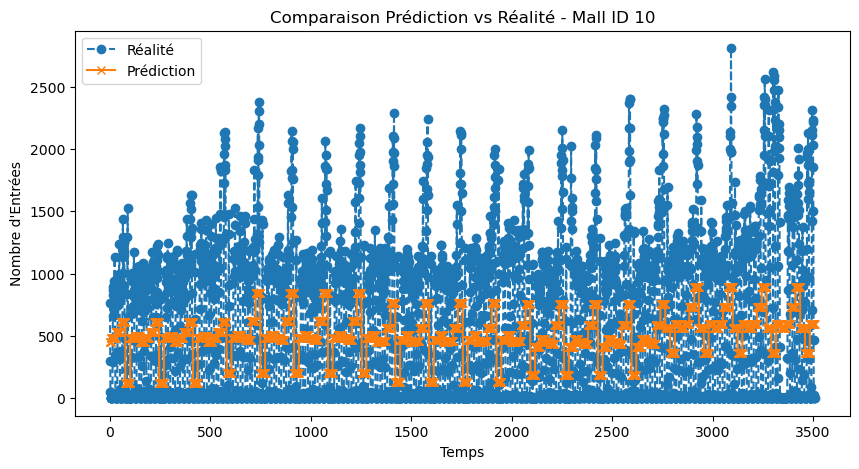

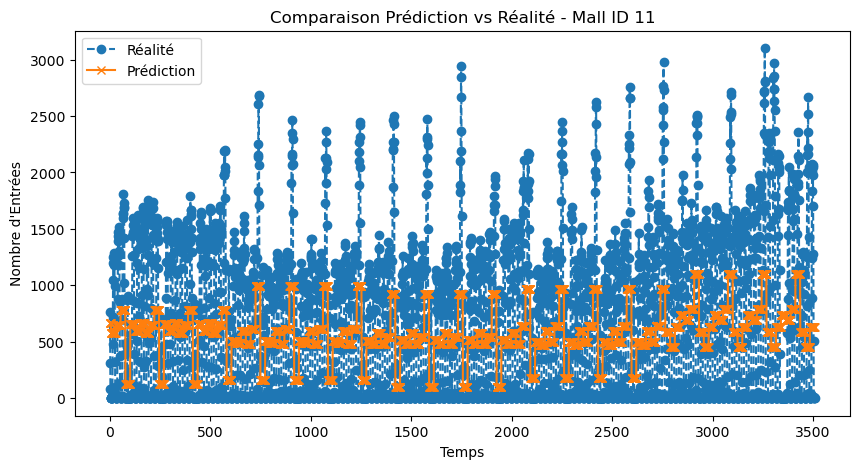

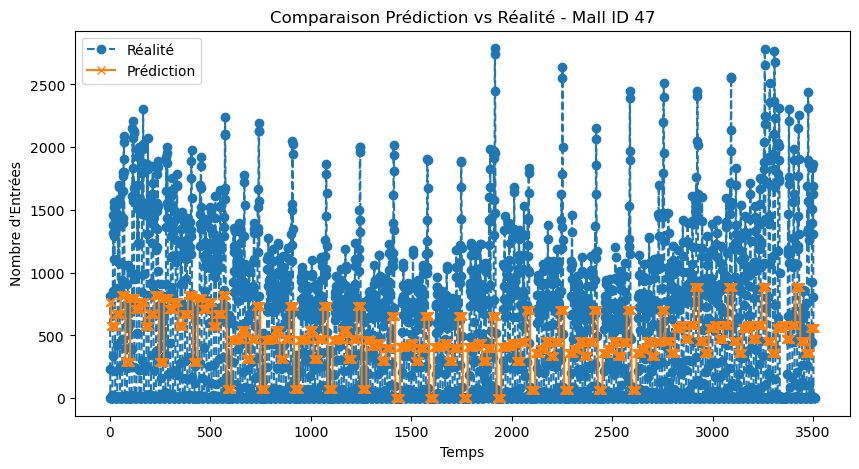

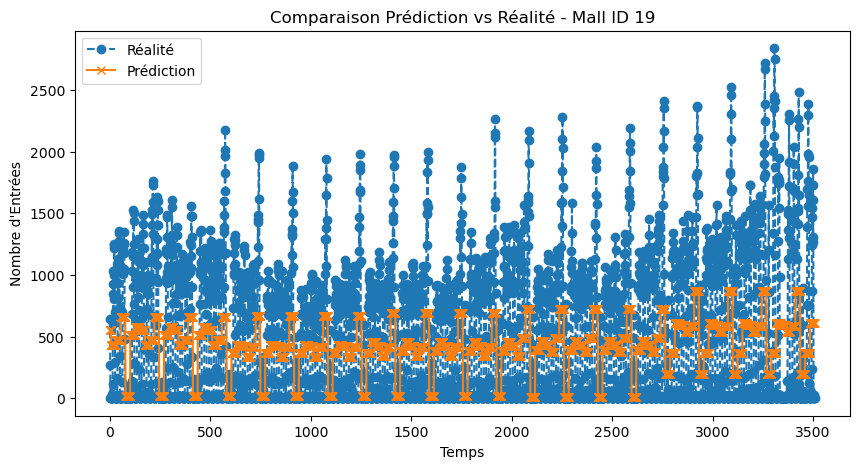

In [41]:
import matplotlib.pyplot as plt

# Boucle pour tracer les courbes de prédiction vs réalité
for mall_id in mall_ids:
    df_mall = df[df['Mall ID'] == mall_id].copy()
    
    # Séparation des features et de la target
    X = df_mall.drop(columns=['Entrées', 'Jour', 'Mall ID'])
    y = df_mall['Entrées']
    
    # Division en train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Récupération du modèle entraîné
    model = results[mall_id]['model']
    
    # Prédictions
    y_pred = model.predict(X_test)
    
    # Tracé des courbes
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label="Réalité", marker='o', linestyle='dashed')
    plt.plot(y_pred, label="Prédiction", marker='x', linestyle='solid')
    plt.title(f"Comparaison Prédiction vs Réalité - Mall ID {mall_id}")
    plt.xlabel("Temps")
    plt.ylabel("Nombre d'Entrées")
    plt.legend()
    plt.show()


Catastrophe on verra si on fait une meilleure baseline plus tard

In [42]:
df.head()

,Jour,Entrées,Mall ID,Année,Mois,jour_semaine,GLA centre (hyper + galerie+ mail) GI,GLA boutiques (hors mail - GI),Nombre places de parking (Assetbook),Nombre de boutiques (hors hyper),ALIMENTATION,EQ DE LA PERSONNE,EQ DE LA MAISON,LOISIRS,RESTAURATION,SERVICES,DIVERS
0,2023-01-01,0.0,53,2023,1,7,-0.243055,-0.909725,1.0,-0.968766,-0.966282,-1.150213,-0.745356,-0.389249,-0.551677,-1.113519,0.419067
1,2023-01-01,0.0,53,2023,1,7,-0.243055,-0.909725,1.0,-0.968766,-0.966282,-1.150213,-0.745356,-0.389249,-0.551677,-1.113519,0.419067
2,2023-01-01,0.0,53,2023,1,7,-0.243055,-0.909725,1.0,-0.968766,-0.966282,-1.150213,-0.745356,-0.389249,-0.551677,-1.113519,0.419067
3,2023-01-01,0.0,53,2023,1,7,-0.243055,-0.909725,1.0,-0.968766,-0.966282,-1.150213,-0.745356,-0.389249,-0.551677,-1.113519,0.419067
4,2023-01-01,0.0,53,2023,1,7,-0.243055,-0.909725,1.0,-0.968766,-0.966282,-1.150213,-0.745356,-0.389249,-0.551677,-1.113519,0.419067
